In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from datetime import timedelta
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from statsmodels.tsa.api import Holt

In [2]:
covid_df= pd.read_csv('covid_19_data.csv')
covid_df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [3]:
print("Dataset shape:\n", covid_df.shape)
print("****************************************")
print("Null values:\n", covid_df.isnull().sum())
print("****************************************")
print("Data types:\n", covid_df.dtypes)

Dataset shape:
 (18327, 8)
****************************************
Null values:
 SNo                   0
ObservationDate       0
Province/State     9277
Country/Region        0
Last Update           0
Confirmed             0
Deaths                0
Recovered             0
dtype: int64
****************************************
Data types:
 SNo                  int64
ObservationDate     object
Province/State      object
Country/Region      object
Last Update         object
Confirmed          float64
Deaths             float64
Recovered          float64
dtype: object


In [4]:
covid_df.columns

Index(['SNo', 'ObservationDate', 'Province/State', 'Country/Region',
       'Last Update', 'Confirmed', 'Deaths', 'Recovered'],
      dtype='object')

In [5]:
covid_df.drop('SNo', axis = 1, inplace=True)

In [6]:
covid_df.head()

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [7]:
covid_df['ObservationDate'] = pd.to_datetime(covid_df['ObservationDate'])

In [8]:
covid_df.dtypes

ObservationDate    datetime64[ns]
Province/State             object
Country/Region             object
Last Update                object
Confirmed                 float64
Deaths                    float64
Recovered                 float64
dtype: object

In [9]:
##Grouping different types of cases per day
datewise = covid_df.groupby(['ObservationDate']).agg({"Confirmed":"sum",
                                                     "Deaths":"sum",
                                                     "Recovered":"sum"})

In [10]:
print("----Basic Information----\n")
print("Total Confirmed Cases:\n", datewise['Confirmed'].iloc[-1])
print("************************************")
print("Total Deaths:\n", datewise['Deaths'].iloc[-1])
print("************************************")
print("Total Recovered:\n", datewise['Recovered'].iloc[-1])
print("************************************")
print("Total no. of Active Cases:\n", (datewise['Confirmed'].iloc[-1] - datewise['Recovered'].iloc[-1] - datewise['Deaths'].iloc[-1]))
print("************************************")
print("Total no. of Closed Cases:\n", (datewise['Recovered'].iloc[-1] + datewise['Deaths'].iloc[-1]))

----Basic Information----

Total Confirmed Cases:
 2811193.0
************************************
Total Deaths:
 197159.0
************************************
Total Recovered:
 793601.0
************************************
Total no. of Active Cases:
 1820433.0
************************************
Total no. of Closed Cases:
 990760.0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93]),
 <a list of 94 Text major ticklabel objects>)

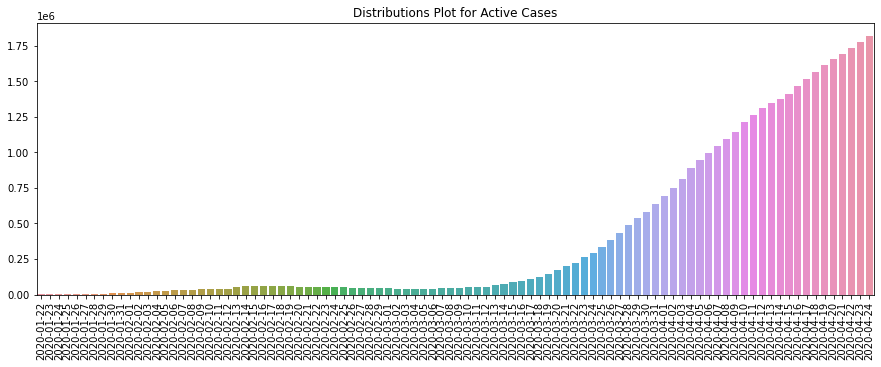

In [11]:
plt.figure(figsize = (15,5))
sns.barplot(x = datewise.index.date, y = datewise['Confirmed'] - datewise['Recovered'] - datewise['Deaths'])
plt.title("Distributions Plot for Active Cases")
plt.xticks(rotation = 90)